In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data =sns.load_dataset("taxis")

In [4]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
data.size

90062

In [6]:
data.shape

(6433, 14)

In [7]:
data.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [8]:
data.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [10]:
data.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [11]:
data.describe(include=object)

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [12]:
data.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [13]:
data.index

RangeIndex(start=0, stop=6433, step=1)

In [14]:
print(data.duplicated().sum())

0


In [15]:
data['color'].unique()

array(['yellow', 'green'], dtype=object)

In [16]:
data['payment'].unique()

array(['credit card', 'cash', nan], dtype=object)

In [17]:
data['pickup_zone'].unique()

array(['Lenox Hill West', 'Upper West Side South', 'Alphabet City',
       'Hudson Sq', 'Midtown East', 'Times Sq/Theatre District',
       'Battery Park City', 'Murray Hill', 'East Harlem South',
       'Lincoln Square East', 'LaGuardia Airport', 'Lincoln Square West',
       'Financial District North', 'Upper West Side North',
       'East Chelsea', 'Midtown Center', 'Gramercy',
       'Penn Station/Madison Sq West', 'Sutton Place/Turtle Bay North',
       'West Chelsea/Hudson Yards', 'Clinton East', 'Clinton West',
       'UN/Turtle Bay South', 'Midtown South', 'Midtown North',
       'Garment District', 'Lenox Hill East', 'Flatiron',
       'TriBeCa/Civic Center', nan, 'Upper East Side North',
       'West Village', 'Greenwich Village South', 'JFK Airport',
       'East Village', 'Union Sq', 'Yorkville West', 'Central Park',
       'Meatpacking/West Village West', 'Kips Bay', 'Morningside Heights',
       'Astoria', 'East Tremont', 'Upper East Side South',
       'Financial Distric

In [18]:
data['dropoff_zone'].nunique()

203

In [19]:
data['dropoff_zone'].value_counts()

dropoff_zone
Upper East Side North    245
Murray Hill              220
Midtown Center           215
Upper East Side South    177
Midtown East             176
                        ... 
Queensboro Hill            1
Homecrest                  1
Madison                    1
Morrisania/Melrose         1
Brooklyn Navy Yard         1
Name: count, Length: 203, dtype: int64

In [20]:
data['pickup_borough'].nunique()

4

In [21]:
data['pickup_borough'].value_counts()

pickup_borough
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: count, dtype: int64

In [22]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [23]:
data['pickup_hour']=data['pickup'].dt.hour
data['pickup_day']=data['pickup'].dt.day
data['pickup_weekday']=data['pickup'].dt.day_name()

In [24]:
data['Duriaction']=(data['dropoff']-data['pickup']).dt.total_seconds()/60

In [25]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,pickup_weekday,Duriaction
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


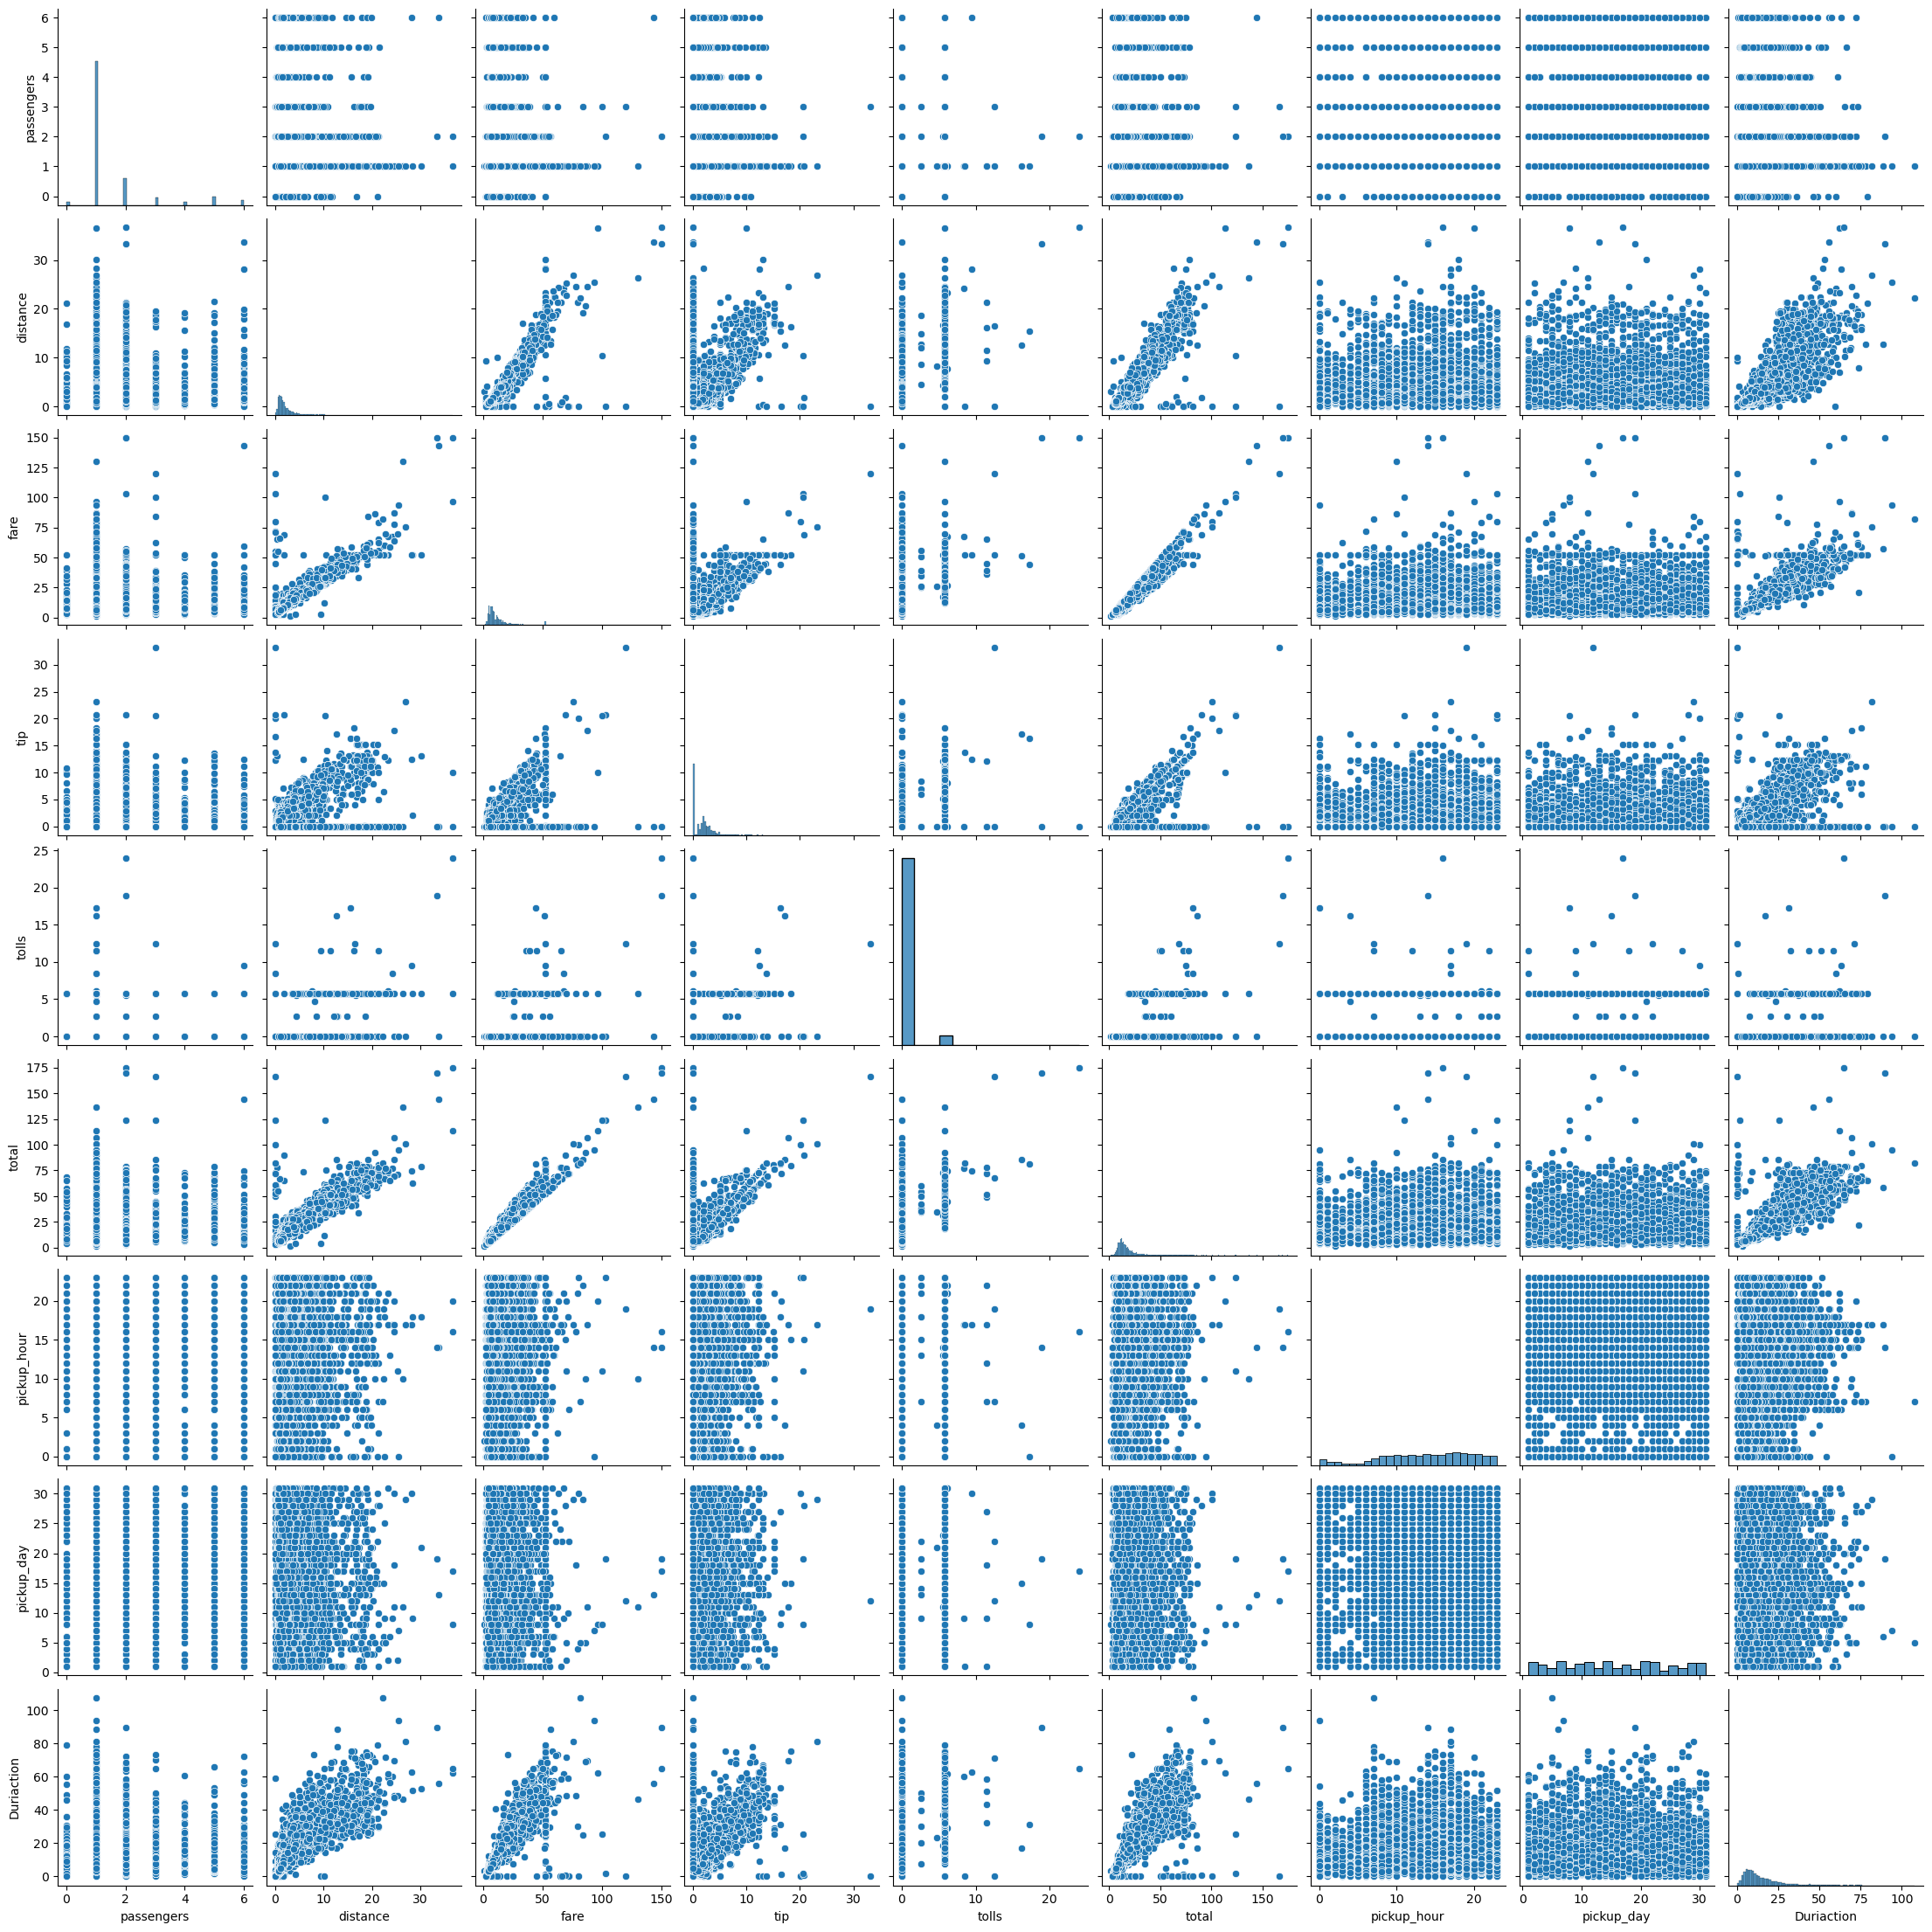

In [43]:
sns.pairplot(data)
plt.show()

 # 1️⃣Scatter Plot

In [44]:
corralation=data.corr(numeric_only = True)
corralation

,passengers,distance,fare,tip,tolls,total,pickup_hour,pickup_day,Duriaction
passengers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708,-0.004406,0.007213,-0.004336
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676,-0.025343,-0.002056,0.821321
fare,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358,-0.011395,-0.003597,0.848068
tip,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186,0.032549,0.017482,0.387725
tolls,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142,0.009886,0.013802,0.459609
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000,0.010275,0.001510,0.818791
pickup_hour,-0.004406,-0.025343,-0.011395,0.032549,0.009886,0.010275,1.000000,0.000876,-0.002385
pickup_day,0.007213,-0.002056,-0.003597,0.017482,0.013802,0.001510,0.000876,1.000000,-0.010644
Duriaction,-0.004336,0.821321,0.848068,0.387725,0.459609,0.818791,-0.002385,-0.010644,1.000000


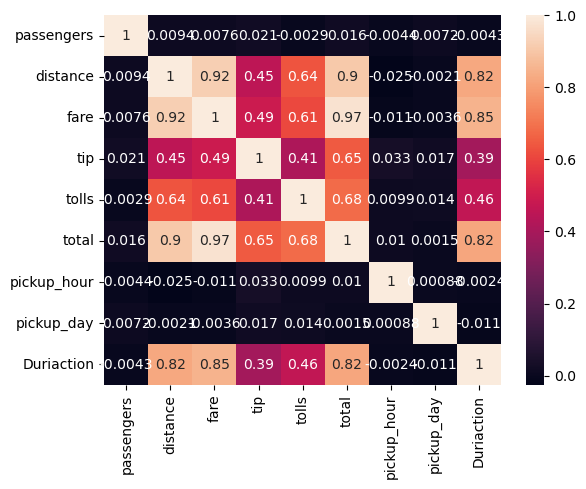

In [45]:
sns.heatmap(corralation,annot=True)
plt.show()

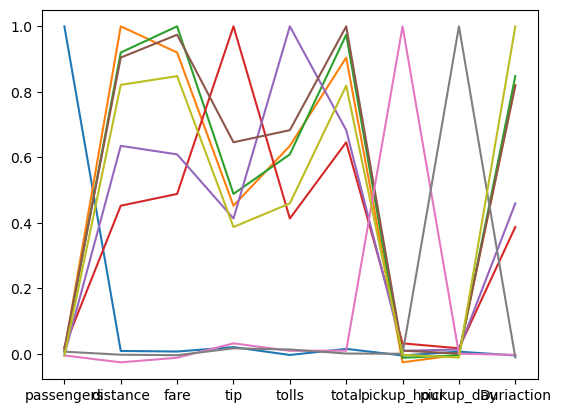

In [46]:
plt.plot(corralation)
plt.show()

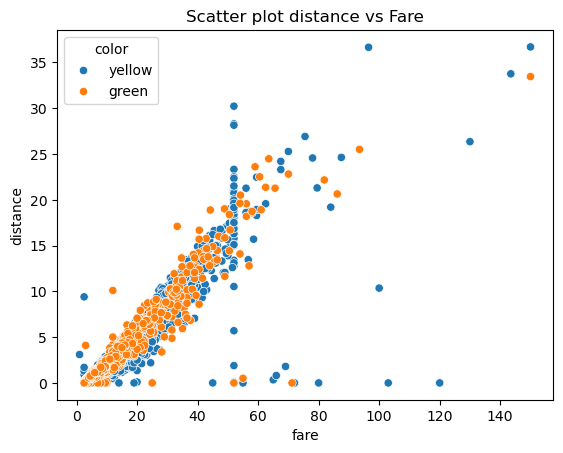

In [47]:
sns.scatterplot(x='fare',y='distance',data=data,hue='color')
plt.title("Scatter plot distance vs Fare")
plt.show()

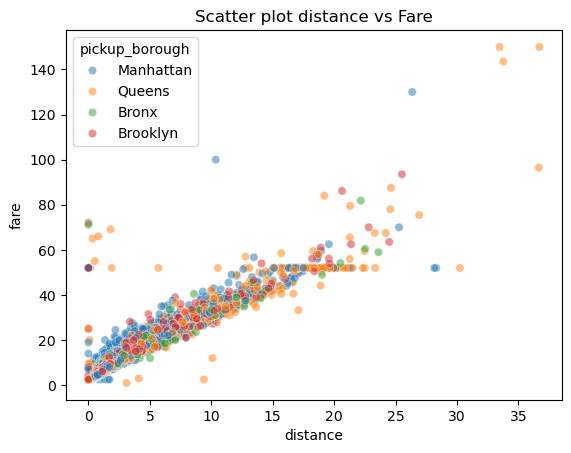

In [48]:
sns.scatterplot(x='distance',y='fare',data=data,hue='pickup_borough',alpha=0.5)
plt.title("Scatter plot distance vs Fare")
plt.show()

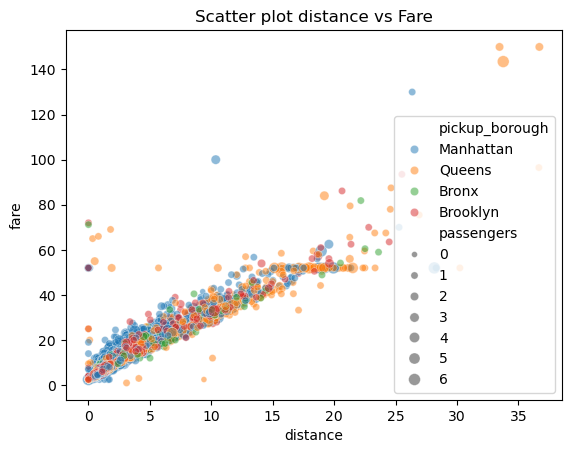

In [49]:
sns.scatterplot(x='distance',y='fare',data=data,hue='pickup_borough',alpha=0.5,size='passengers')
plt.title("Scatter plot distance vs Fare")
plt.show()

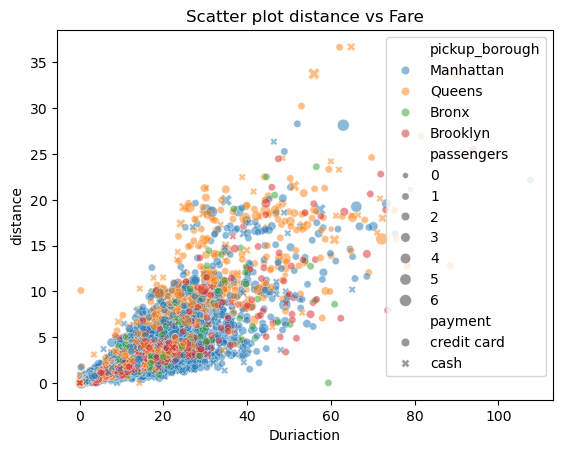

In [50]:
sns.scatterplot(x='Duriaction',y='distance',data=data,hue='pickup_borough',alpha=0.5,size='passengers',style='payment')
plt.title("Scatter plot distance vs Fare")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9844\4048677656.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='pickup_hour',y='fare',data=data,estimator='mean',ci=None)


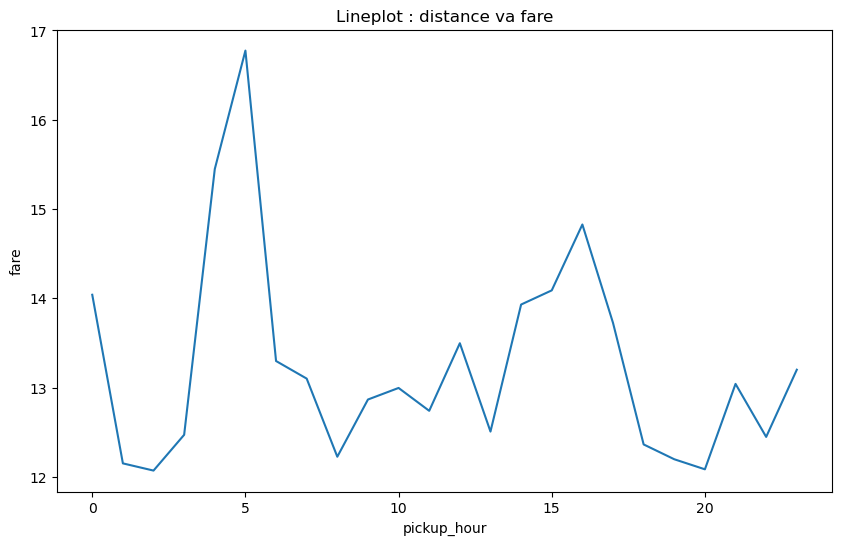

In [52]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_hour',y='fare',data=data,estimator='mean',ci=None)
plt.title('Lineplot : distance va fare')
plt.show()

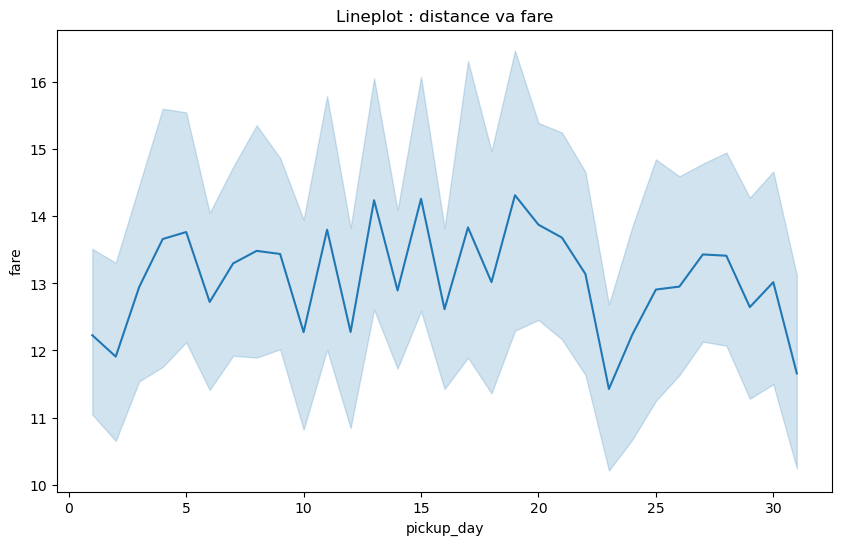

In [58]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_day',y='fare',data=data,estimator='mean', markers="o",)
plt.title('Lineplot : distance va fare')
plt.show()

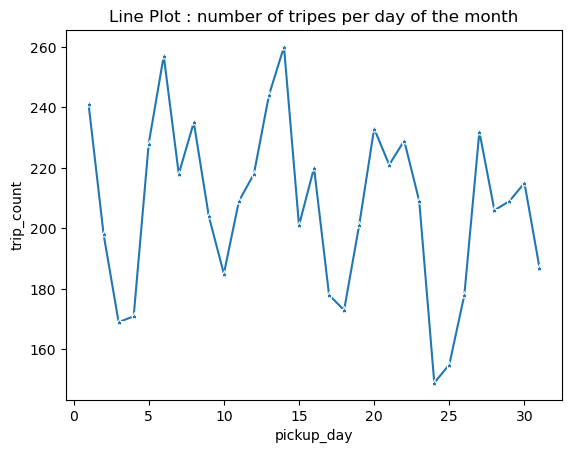

In [29]:
trip_per_day=data.groupby('pickup_day').size().reset_index(name="trip_count")
sns.lineplot(x='pickup_day',y='trip_count',data=trip_per_day,marker='*')
plt.title('Line Plot : number of tripes per day of the month')
plt.show()

In [30]:
print(trip_per_day)

    pickup_day  trip_count
0            1         241
1            2         198
2            3         169
3            4         171
4            5         228
5            6         257
6            7         218
7            8         235
8            9         204
9           10         185
10          11         209
11          12         218
12          13         244
13          14         260
14          15         201
15          16         220
16          17         178
17          18         173
18          19         201
19          20         233
20          21         221
21          22         229
22          23         209
23          24         149
24          25         155
25          26         178
26          27         232
27          28         206
28          29         209
29          30         215
30          31         187


C:\Users\hp\AppData\Local\Temp\ipykernel_4176\3557933496.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='pickup_weekday',y='tip',hue="payment",data=data,ci=False)


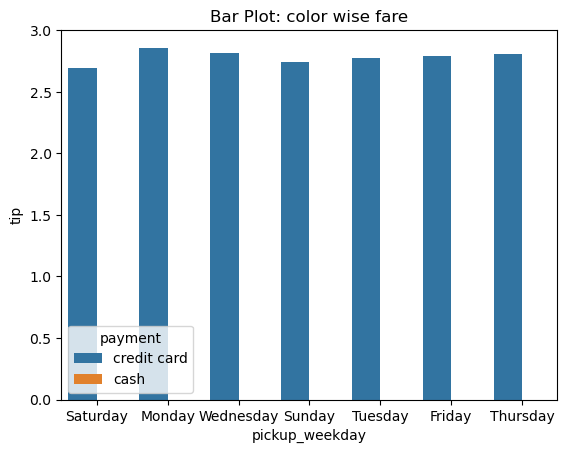

In [31]:
sns.barplot(x='pickup_weekday',y='tip',hue="payment",data=data,ci=False)
plt.title("Bar Plot: color wise fare")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4176\3315268989.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='pickup_weekday',y='total',hue="payment",data=data,ci=False)


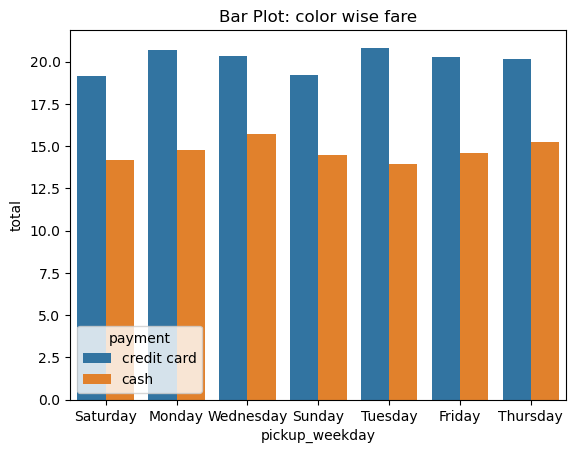

In [32]:
sns.barplot(x='pickup_weekday',y='total',hue="payment",data=data,ci=False)
plt.title("Bar Plot: color wise fare")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4176\657771676.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="pickup_borough",y='distance',data=data,ci=False)


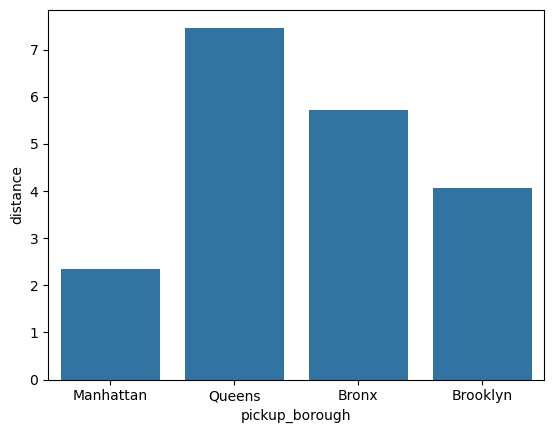

In [33]:
sns.barplot(x="pickup_borough",y='distance',data=data,ci=False)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4176\518226337.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="pickup_borough",y='tip',data=data,ci=False)


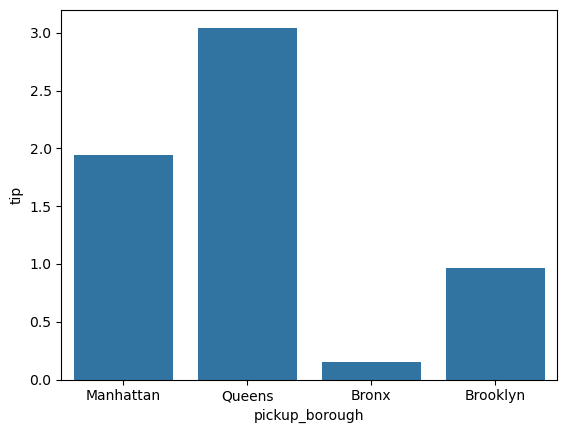

In [40]:
sns.barplot(x="pickup_borough",y='tip',data=data,ci=False)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4176\1107868778.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="passengers",y='tip',data=data,ci=False)


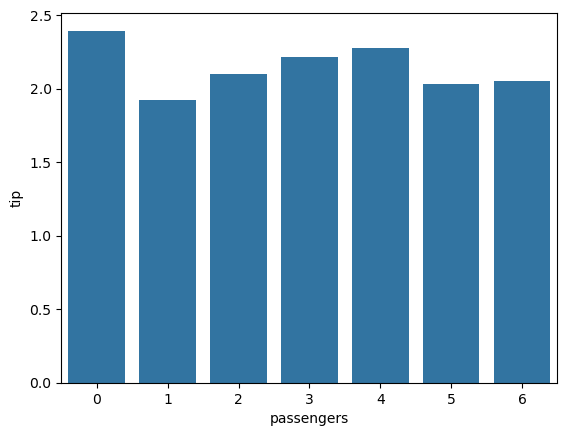

In [35]:
sns.barplot(x="passengers",y='tip',data=data,ci=False)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4176\66695067.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="payment",y='total',data=data,ci=False)


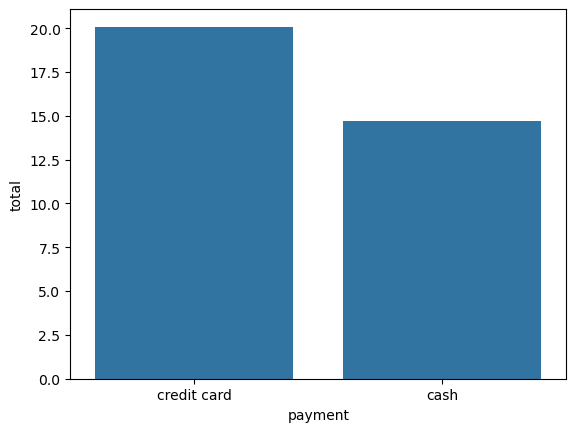

In [36]:
sns.barplot(x="payment",y='total',data=data,ci=False)
plt.show()

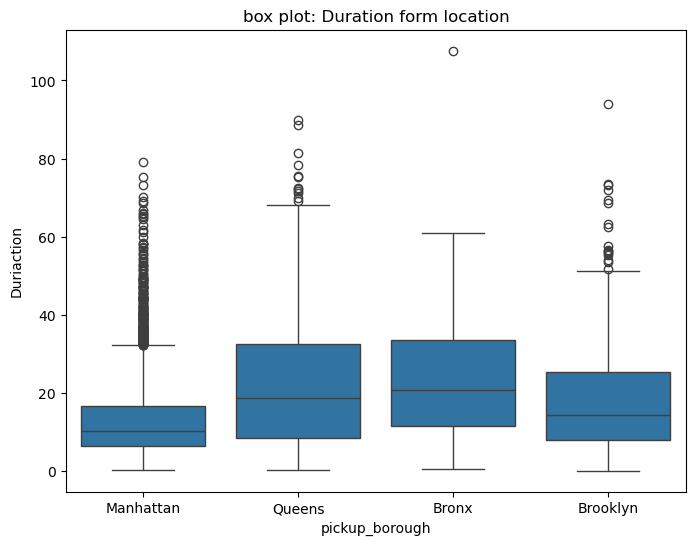

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x='pickup_borough',y='Duriaction',data=data)
plt.title("box plot: Duration form location")
plt.show()

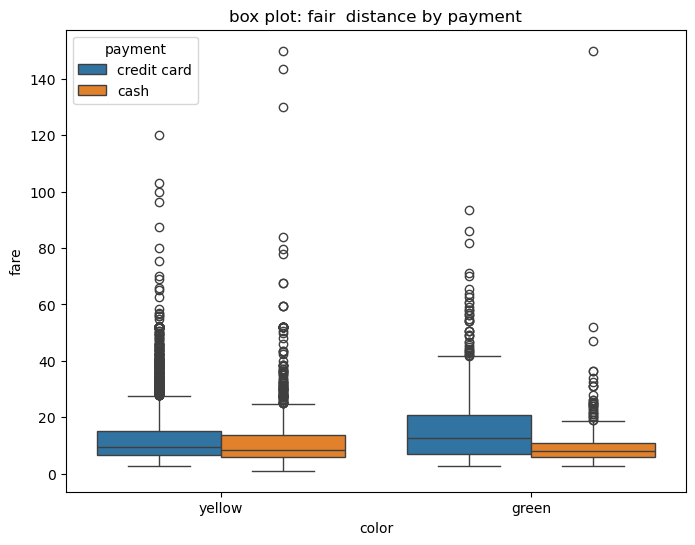

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x='color',y='fare',hue="payment",data=data)
plt.title("box plot: fair  distance by payment")
plt.show()

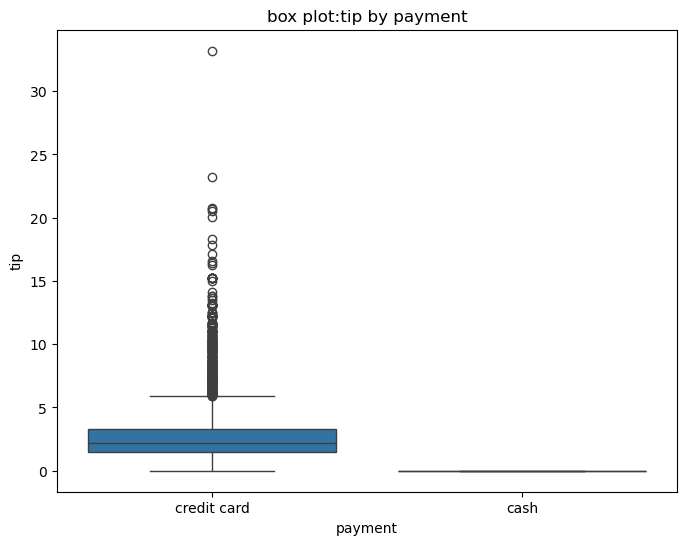

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(x='payment',y='tip',data=data)
plt.title("box plot:tip by payment")
plt.show()

<Axes: xlabel='distance', ylabel='Count'>

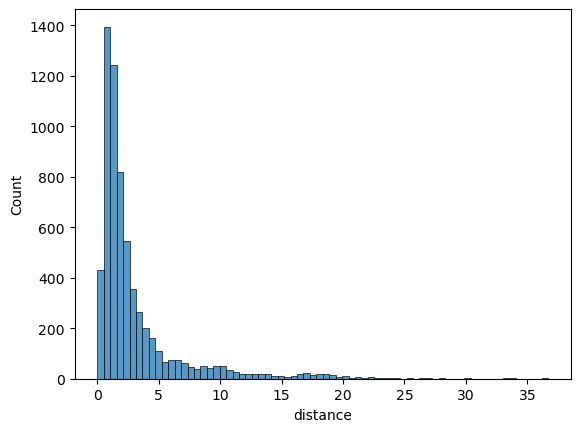

In [50]:
sns.histplot(x='distance',data=data,bins=70)

<Axes: xlabel='fare', ylabel='Count'>

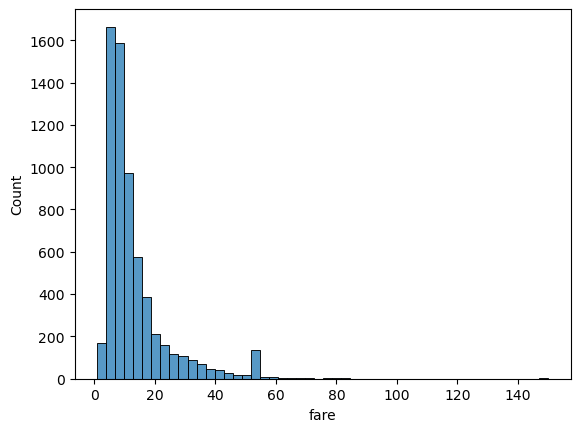

In [51]:
sns.histplot(x='fare',bins=50,data=data)

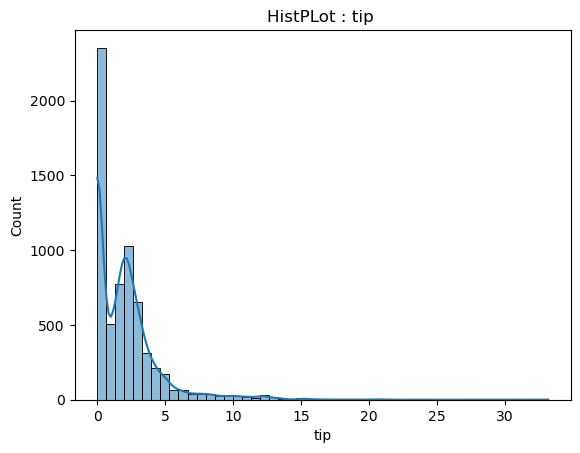

In [52]:
sns.histplot(data['tip'],bins=50,kde=True)
plt.title('HistPLot : tip ')
plt.show()

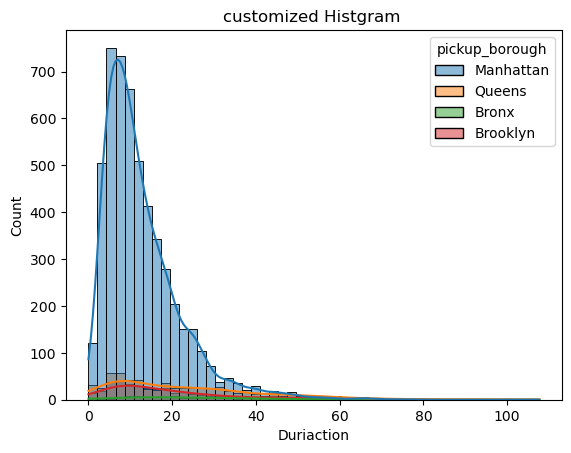

In [56]:
sns.histplot(x=data['Duriaction'],hue='pickup_borough',bins=50,kde=True,color='b',data=data)
plt.title("customized Histgram ")
plt.show()